In [19]:
from numpy import e
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

df=pd.read_excel("Genshin Impact Revenue.xlsx")
df.dropna(inplace=True)

E = df[['Avg Revenue/Day','Revenue']]


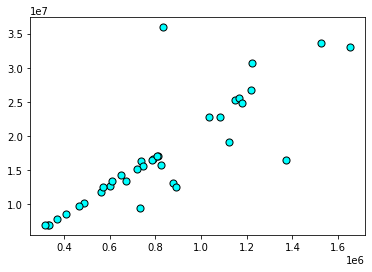

In [20]:
# Scatter plot
plt.scatter(
   E.iloc[:, 0], E.iloc[:, 1],
   c='cyan', marker='o',
   edgecolor='black', s=50
)
plt.show()


[0 0 1 1 1 1 1 2 1 1 2 2 1 2 2 1 2 0 2 2 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1]


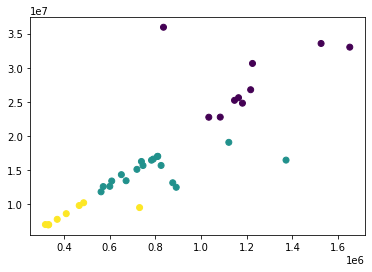

In [21]:
# Train K-Means clustering
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0)

y_km = km.fit_predict(E)
print(y_km)

plt.scatter(E.iloc[:,0],E.iloc[:,1],c=y_km)


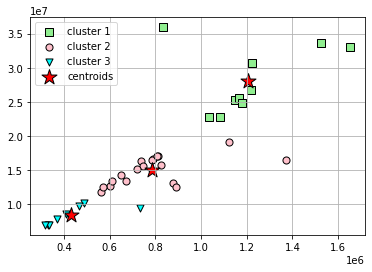

In [22]:
# Plot the clusters
plt.scatter(
    E.iloc[y_km == 0, 0], E.iloc[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    E.iloc[y_km == 1, 0], E.iloc[y_km == 1, 1],
    s=50, c='pink',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    E.iloc[y_km == 2, 0], E.iloc[y_km == 2, 1],
    s=50, c='cyan',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


In [23]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(E)
    distortions.append(km.inertia_)

print(distortions)


[2198972718953629.0, 532040347731156.6, 290884960279079.7, 112045586842026.56, 55684969986891.734, 44653245603193.62, 34985036366455.105, 33715742076014.938, 24759060059630.36, 14763490972473.871]


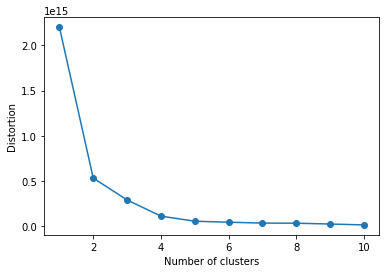

In [24]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
